In [69]:
# Import and install shared utils.
from IPython.display import display, display_html
from ml_metadata.proto import metadata_store_pb2

%run 'mlmd_query_utils.ipynb'
%run 'mlmd_utils.ipynb'

/usr/local/google/home/huimiao/tmp/1550198063
/usr/local/google/home/huimiao/tmp/1550198063
Archive:  /usr/local/google/home/huimiao/tmp/1550198063/airflow_data.zip
   creating: /usr/local/google/home/huimiao/tmp/1550198063/data/
   creating: /usr/local/google/home/huimiao/tmp/1550198063/data/tfx/
   creating: /usr/local/google/home/huimiao/tmp/1550198063/data/tfx/pipelines/
   creating: /usr/local/google/home/huimiao/tmp/1550198063/data/tfx/pipelines/chicago_taxi_pipeline_local/
  inflating: /usr/local/google/home/huimiao/tmp/1550198063/data/tfx/pipelines/chicago_taxi_pipeline_local/metadata.db  
   creating: /usr/local/google/home/huimiao/tmp/1550198063/data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/
   creating: /usr/local/google/home/huimiao/tmp/1550198063/data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/evaluator/
   creating: /usr/local/google/home/huimiao/tmp/1550198063/data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/evaluator/output/
   creating: /

/usr/local/google/home/huimiao/tmp/1550198063//data/taxi_data/no_split/span_1
/usr/local/google/home/huimiao/tmp/1550198063//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/examples_gen/output/2/data.tfrecord
/usr/local/google/home/huimiao/tmp/1550198063//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/statistics_gen/output/3/data.tfrecord
/usr/local/google/home/huimiao/tmp/1550198063//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/schema_gen/output/4/schema.pbtxt
/usr/local/google/home/huimiao/tmp/1550198063//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/transform/transform_output/5/transform_output
/usr/local/google/home/huimiao/tmp/1550198063//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/transform/transformed_examples/5/tfx.transformed
/usr/local/google/home/huimiao/tmp/1550198063//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/example_validator/output/6/anomalies.pbtxt
/usr/local/google/home/huimiao/tmp/1550198063//

/usr/local/google/home/huimiao/tmp/1550198075//data/taxi_data/no_split/span_1
/usr/local/google/home/huimiao/tmp/1550198075//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/examples_gen/output/2/data.tfrecord
/usr/local/google/home/huimiao/tmp/1550198075//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/statistics_gen/output/3/data.tfrecord
/usr/local/google/home/huimiao/tmp/1550198075//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/schema_gen/output/4/schema.pbtxt
/usr/local/google/home/huimiao/tmp/1550198075//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/transform/transform_output/5/transform_output
/usr/local/google/home/huimiao/tmp/1550198075//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/transform/transformed_examples/5/tfx.transformed
/usr/local/google/home/huimiao/tmp/1550198075//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/example_validator/output/6/anomalies.pbtxt
/usr/local/google/home/huimiao/tmp/1550198075//

By default, we connect to a pre-generated tfx-oss run's metadata store in SrcFS. 

If you wish to connect to your own tfx-oss metadata store of an airflow run, please set the `filename_uri` to the path. 

In [70]:
# Setup a read-only connection to the ML-Metadata store.
metadata_db_path = default_metadata_db_path
store = get_metadata_store(
    filename_uri=metadata_db_path,
    connection_mode=metadata_store_pb2.SqliteMetadataSourceConfig.READONLY)

First, let's look at the training execution and the hyperparamters associated with that run. 

The `TFX_EXECUTION_TRAINER` used below (defined in `./mlmd_utils.ipynb`) is the execution type name. Now we use a trainer's type name to show all runs of the trainer. You can change it to other execution type name constant, e.g., `TFX_EXECUTION_EXAMPLE_GEN`.

In [71]:
# Visualize all TFX Trainer runs.
display(get_executions_of_type_df(TFX_EXECUTION_TRAINER))

,EVAL_STEPS,LOG_ROOT,WARM_START_FROM,WARM_STARTING,STATE,CHECKSUM_MD5,MODULE_FILE,TRAIN_STEPS
ID,,,,,,,,
7,5000,/var/tmp/tfx/logs/chicago_taxi_pipeline_local/...,None,True,complete,1477864c3749c2c49466624f83a1632e,/usr/local/google/home/huimiao/airflow/plugins...,10000


Similarly, we can also see all artifacts generated during the pipeline. In the code below, `TFX_ARTIFACT_MODEL` is the artifact_type of trained models (defined in `./mlmd_utils.ipynb`). To check other types of artifacts (e.g., `TFX_ARTIFACT_SCHEMA`), you can replace the constant accordingly. 

In [72]:
# Visualize all TFX Model artifacts.
display(get_artifacts_of_type_df(TFX_ARTIFACT_MODEL))

,DEFAULT_FILE_NAME,SPAN,NAME,TYPE_NAME,URI,STATE,SPLITS
ID,,,,,,,
8,,1,output,ModelExportPath,/usr/local/google/home/huimiao/tmp/1550198075/...,published,


Next, we show how to use ml_metadata to trace the lineage and introspect the artifacts. In this example, we show the status of this model along with details of the trainer task generates it. 

In [73]:
# Visualize properties of the model and the trainer run that generated the model.
model_id = store.get_artifacts_by_type(TFX_ARTIFACT_MODEL)[0].id
trainer_id = get_execution_for_output_artifact(model_id, TFX_EXECUTION_TRAINER).id

# Get data frames to visualize the model and trainer run properties .
model_df = get_artifact_df(model_id)
trainer_df = get_execution_df(trainer_id)

# Style the data frames to set captions.
model_df_styler = model_df.style.set_caption('Properties for Model {}'.format(model_id))
trainer_df_styler = trainer_df.style.set_caption('Trainer Run Properties for Model {}'.format(model_id))

# Show me.
display_html(model_df_styler._repr_html_() + trainer_df_styler._repr_html_(), raw=True)

,
DEFAULT_FILE_NAME,
SPAN,1
NAME,output
TYPE_NAME,ModelExportPath
URI,/usr/local/google/home/huimiao/tmp/1550198075//data/tfx/pipelines/chicago_taxi_pipeline_local/taxi-local/trainer/output/7/
STATE,published
SPLITS,
,
EVAL_STEPS,5000
LOG_ROOT,/var/tmp/tfx/logs/chicago_taxi_pipeline_local/taxi-local/trainer


Suppose this model needs more investigation, we can introspect the input data, model evaluation results, and model metrics with TFDV, TFMA, and Tensorboard.

In the Cell below, we first show the data that is used to train this model with TFDV. 

In [74]:
# Visualize stats for data that was used to generate model_id.
display_data_stats_for_model(model_id)

Next, with TFMA, we show the metrics (e.g., AUC, Precision, Recall) sliced by the column indicating the trip starting time. 

In [75]:
# Visualize TFMA analysis for model_id.
display_tfma_analysis(model_id, slicing_column='trip_start_hour')

U2xpY2luZ01ldHJpY3NWaWV3ZXIoY29uZmlnPXsnd2VpZ2h0ZWRFeGFtcGxlc0NvbHVtbic6ICdwb3N0X2V4cG9ydF9tZXRyaWNzL2V4YW1wbGVfY291bnQnfSwgZGF0YT1beydtZXRyaWNzJzrigKY=


By connecting to tensorboard, we can analyze the model in Tensorboard interactively.

In [76]:
# Open up Tensorboard for model_id.
print(display_tensorboard(model_id))

http://huimiao.c.googlers.com:45255


Here, ml_metadata also enables lineage queries to reason about the artifact provenance. The figure below shows the full lineage w.r.t. the model artifact. 

Try to set the `num_hops` to limit the lineage path length. You can also change the `model_id` to other artifact_ids to see their lineage details.

<IPython.core.display.Javascript object>


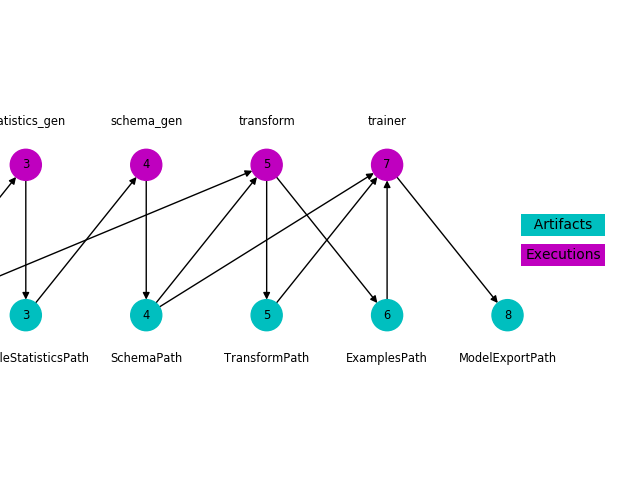

In [77]:
# Visualize the lineage of model_id.
num_hops = None
get_and_plot_artifact_lineage(model_id, num_hops)

__If you have more than one model trained__, you can use ml_metadata to analyze two models by comparing metrics and data status. 

In [78]:
# Now let's try to compare two models.
num_models = len(store.get_artifacts_by_type(TFX_ARTIFACT_MODEL))
if num_models > 1: 
    other_model_id = store.get_artifacts_by_type(TFX_ARTIFACT_MODEL)[1].id
    other_trainer_id = get_execution_for_output_artifact(other_model_id, TFX_EXECUTION_TRAINER).id

    # First let's take a look at the properties of the 2 models.
    df = get_df_from_artifacts_or_executions(store.get_artifacts_by_id([model_id, other_model_id]), True)
    models_df_styler = df.style.set_caption('Properties for Model {}, {}'.format(model_id, other_model_id))

    # Compare properties of the trainer runs that generated these models.
    trainer_df = get_df_from_artifacts_or_executions(store.get_executions_by_id([trainer_id, other_trainer_id]), False)
    trainers_df_styler = trainer_df.style.set_caption('Properties for Trainer runs of model {}, {}'.format(model_id, other_model_id))

    display_html(models_df_styler._repr_html_() + trainers_df_styler._repr_html_(), raw=True)
    


In [79]:
# Visualize stats for data that was used to generate model_id and other_model_id.
if num_models > 1: 
    display_data_stats_for_model(model_id, other_model_id=other_model_id)

In [80]:
# Compare Tensorboard metrics for different models.
if num_models > 1: 
    print(display_tensorboard(model_id, other_model_id=other_model_id))

In [81]:
# Compare TFMA metrics for different models.
if num_models > 1: 
    compare_tfma_analysis(model_id, other_model_id)

In [82]:
# Visualize the lineage of 2 different model_ids.
if num_models > 1: 
    get_and_plot_artifact_lineage(model_id)
    get_and_plot_artifact_lineage(other_model_id)